# MNIST MLP Example

In this notebook, we build a multi-layer perceptron network to classify handwritten digits (MNIST dataset).

In [1]:
import os
import cv2
import IPython
from datetime import datetime
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.python import keras

## Load MNIST dataset

First, we load MNIST dataset using TensorFlow Keras datasets API. The training set is composed of 60,000 28x28 gray-level images with black background and white digits. The test set is composed of 10,000 such images.

The value of each pixel ranges from 0 to 255. So, we normalize them between 0 and 1.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.
x_test = x_test / 255.

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

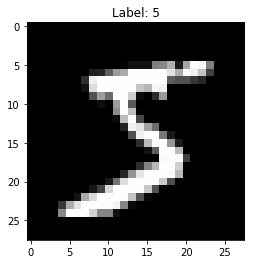

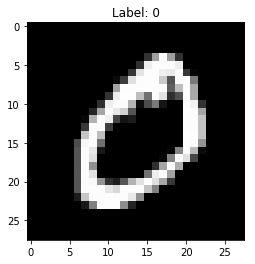

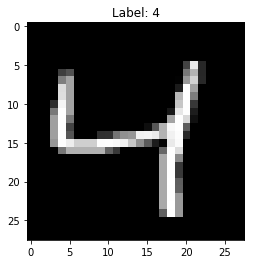

In [4]:
for i in range(3):
    plt.figure()
    img = x_train[i, :, :]
    plt.title("Label: %d" % y_train[i])
    plt.imshow(img, cmap="gray")
    plt.show()

In [5]:
print("Training Set Data (X): ", x_train.shape)
print("Training Set Labels (Y): ", y_train.shape)
print("Testing Set Data (X): ", x_test.shape)
print("Testing Set Labels (Y): ", y_test.shape)

Training Set Data (X):  (60000, 28, 28)
Training Set Labels (Y):  (60000,)
Testing Set Data (X):  (10000, 28, 28)
Testing Set Labels (Y):  (10000,)


## Training Model

We first build the MLP network.
First, we flatten the 28x28 image into a vector of size 784.
The hidden layer is a fully connected layer of 128 neurons with `relu` as activation function.
The output layer is a fully connected softmax layer for multi-class classification.

To train the model, we use `crossentropy` as our loss function and `Adam` optimizer.

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(
    x=x_train, y=y_train, epochs=5
)

Epoch 1/5
60000/60000 [==============================] - 11s 190us/sample - loss: 0.2570 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.1148 - accuracy: 0.9665
Epoch 3/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0783 - accuracy: 0.9761
Epoch 4/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0580 - accuracy: 0.9824
Epoch 5/5
60000/60000 [==============================] - 19s 319us/sample - loss: 0.0449 - accuracy: 0.9862


## Evaluate the model

With the model trained, we predict the class label for the handwritten digits in the test set.
The accuracy and per-class classification summary is calculated using `accuracy_score` and `classification_report` provided by the `sklearn` library.

In [8]:
y_pred = model.predict_classes(x=x_test)
print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=[
    '%d' % i for i in range(10)
], digits=5))


Test Accuracy:  0.9771
              precision    recall  f1-score   support

           0    0.99072   0.98061   0.98564       980
           1    0.99203   0.98678   0.98940      1135
           2    0.97222   0.98353   0.97784      1032
           3    0.97148   0.97822   0.97484      1010
           4    0.98643   0.96232   0.97423       982
           5    0.98851   0.96413   0.97616       892
           6    0.97228   0.98852   0.98033       958
           7    0.97386   0.97860   0.97623      1028
           8    0.95291   0.97639   0.96450       974
           9    0.97120   0.96928   0.97024      1009

   micro avg    0.97710   0.97710   0.97710     10000
   macro avg    0.97716   0.97684   0.97694     10000
weighted avg    0.97725   0.97710   0.97712     10000



## Real-time Handwritten Digits Classification

To make the demonstration more appealing, we apply the model to the beautiful high-resolution morphed handwritten digits animation generated by a combination of Compositional Pattern Producing Network (CPPN), Generative Adverserial Network (GAN) and Variational Auto-Encoder (VAE), provided in the [MIT Deep Learning Tutorial](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb).

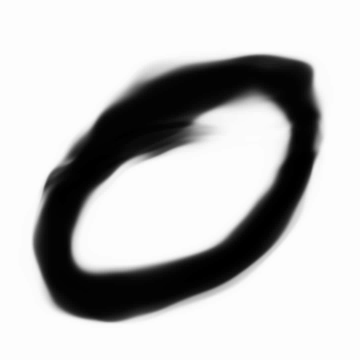

In [11]:
import IPython

mnist_dream_path = "mnist_dream.mp4"

def cv2_imshow(img):
    ret = cv2.imencode('.png', img)[1].tobytes() 
    img_ip = IPython.display.Image(data=ret)
    IPython.display.display(img_ip)

cap = cv2.VideoCapture(mnist_dream_path) 
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
               
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
    
        # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)
        
cap.release()
if vw is not None:
    vw.release()

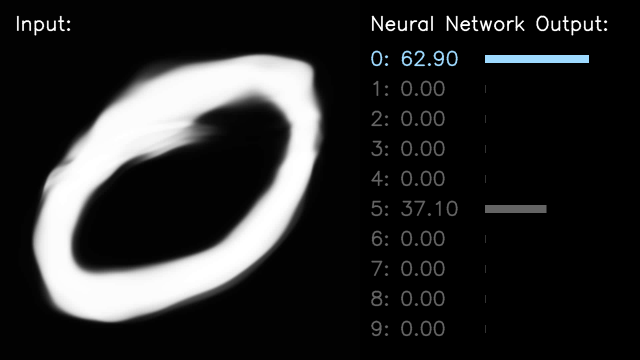

In [19]:
import numpy as np

def drawPrediction(img, y_pred, y_class):
    img = 255 - img
    pad_color = 0
    img = np.pad(img, ((0,0), (0,1280-720), (0,0)), mode='constant', constant_values=(pad_color))  
    
    line_type = cv2.LINE_AA
    font_face = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1.3        
    thickness = 2
    x, y = 740, 60
    color = (255, 255, 255)
    
    text = "Neural Network Output:"
    cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
    
    text = "Input:"
    cv2.putText(img, text=text, org=(30, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)   
        
    y = 130
    for i, p in enumerate(y_pred):
        if i == y_class: color = (255, 218, 158)
        else: color = (100, 100, 100)
            
        rect_width = 0
        if p > 0: rect_width = int(p * 3.3)
        
        rect_start = 230
        cv2.rectangle(img, (x+rect_start, y-5), (x+rect_start+rect_width, y-20), color, -1)

        text = "%d: %3.2f" % (i, p)
        cv2.putText(img, text=text, org=(x, y), fontScale=font_scale, fontFace=font_face, thickness=thickness,
                    color=color, lineType=line_type)
        y += 60
    return img

cap = cv2.VideoCapture(mnist_dream_path) 
vw = None
frame = -1 # counter for debugging (mostly), 0-indexed

while True: # should 481 frames
    frame += 1
    ret, img = cap.read()
    if not ret: break
               
    assert img.shape[0] == img.shape[1] # should be a square
    if img.shape[0] != 720:
        img = cv2.resize(img, (720, 720))
    
    # Pre-process the image for prediction
    img_proc = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_proc = cv2.resize(img_proc, (28, 28))
    img_proc = img_proc / 255.
    img_proc = 1 - img_proc # inverse since training dataset is white text with black background
    img_proc = np.expand_dims(img_proc, axis=0)
    
    # Run Prediction
    y_pred = model.predict_proba(img_proc)[0, :]
    y_class = np.argmax(y_pred)
    
    img = drawPrediction(img, y_pred * 100, y_class)
    
    # scale down image for display
    img_disp = cv2.resize(img, (0,0), fx=0.5, fy=0.5)
    cv2_imshow(img_disp)
    IPython.display.clear_output(wait=True)

cap.release()
if vw is not None:
    vw.release()